# Predicting Customer Satisfaction using Logistic Regression


### Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('Invistico_Airline.csv').dropna() # Drop rows with missing values

### Data Preparation

In [2]:
# Encode target to binary
df = pd.read_csv('Invistico_Airline.csv').dropna()
df['satisfaction'] = df['satisfaction'].str.lower().map({
    'satisfied': 1, 'neutral or dissatisfied': 0, 'dissatisfied': 0
}).astype(int) #Converts the satisfaction column to lowercase. Maps satisfaction levels to binary values: satisfied → 1, neutral or dissatisfied or dissatisfied → 0, Casts the result to int

# Feature / target split
X = pd.get_dummies(df.drop('satisfaction', axis=1), drop_first=True) # Converts categorical columns to one-hot vectors using pd.get_dummies() with drop_first=True to avoid dummy variable trap.
y = df['satisfaction'].values


# Standardization + bias column
X = X.to_numpy(dtype=float)
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_std[X_std == 0] = 1
X = (X - X_mean) / X_std

X = np.hstack([X, np.ones((X.shape[0], 1))]) # Adds a bias column (column of 1s) to the feature matrix for the bias term.

# Train-test split (80/20)
np.random.seed(42)
idx = np.random.permutation(len(X))
split = int(0.8 * len(X)) # 80% for training, 20% for testing
X_train, X_test = X[idx[:split]], X[idx[split:]]
y_train, y_test = y[idx[:split]], y[idx[split:]]



###  Logistic Regression (Scratch)

In [3]:
# Logistic Regression (scratch)
class LRS:
    def __init__(self, lr=0.01, ti=500):
        self.lr = lr # Learning rate
        self.ti = ti # Number of training iterations.

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500))) # Clipping to avoid overflow in exp function

    def fit(self, X, y):
        self.W = np.zeros(X.shape[1]) # Initialize weights to zero
        self.losses = [] # Track cost over time
        for _ in range(self.ti):
            z = np.dot(X, self.W)  # Linear combination
            h = self.sigmoid(z) # Predicted probabilities
            gradient = np.dot(X.T, (h - y)) / len(y) # Gradient of cost
            self.W -= self.lr * gradient # Update weights using gradient descent
            cost = -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
            self.losses.append(cost)
        return self

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.W)) >= 0.5).astype(int) #calculate predicted probabilities


### Training & Evaluation with Multiple Learning Rates

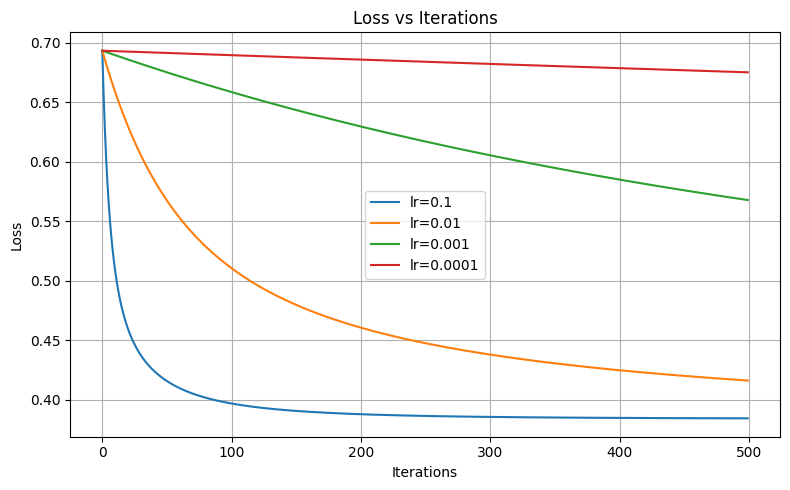

In [4]:

# Train four learning rates 
rates = [0.1, 0.01, 0.001, 0.0001]
results = []

plt.figure(figsize=(8,5))
for lr in rates:
    model = LRS(lr=lr).fit(X_train, y_train)
    train_acc = (model.predict(X_train) == y_train).mean() * 100
    test_acc = (model.predict(X_test) == y_test).mean() * 100
    results.append((lr, round(train_acc, 2), round(test_acc, 2)))
    plt.plot(model.losses, label=f"lr={lr}")

# Plotting
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Accuracy summary 

In [5]:
# Accuracy summary 
import pandas as pd
summary_df = pd.DataFrame(results, columns=["Learning Rate", "Train Acc (%)", "Test Acc (%)"])
summary_df

,Learning Rate,Train Acc (%),Test Acc (%)
0,0.1000,83.57,83.44
1,0.0100,82.62,82.59
2,0.0010,80.52,80.34
3,0.0001,80.13,79.93
